In [2]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [3]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [4]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import scikitplot as skplt

# Read the CSV and Perform Basic Data Cleaning

In [5]:
df = pd.read_csv("data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

In [7]:
df.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6.991000e+03,6991.000000,6991.000000,6991.000000,...,6991.000000,6991.000000,6991.000000,6991.00000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000
mean,0.157059,0.244743,0.202975,0.125018,56.191248,1.851122e-03,-1.851122e-03,164.488820,0.009340,-0.009340,...,-161.206980,4.305049,0.121091,-0.14048,1.740749,0.352710,-0.388568,292.082406,43.812143,14.271508
std,0.363882,0.429966,0.402243,0.330763,117.570962,7.184503e-03,7.184503e-03,67.020475,0.021989,0.021989,...,71.448481,0.439238,0.132048,0.08199,5.903415,0.839017,1.907797,4.762908,3.606167,1.350802
min,0.000000,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.568000e-01,120.515914,0.000009,-0.569000,...,-1733.000000,0.047000,0.000000,-1.00700,0.109000,0.000000,-103.825000,279.856080,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.620126,5.005000e-06,-2.401000e-04,132.683917,0.001145,-0.010000,...,-197.000000,4.209000,0.044000,-0.19500,0.829000,0.128000,-0.252000,288.704730,40.797760,13.455000
50%,0.000000,0.000000,0.000000,0.000000,8.947426,3.300000e-05,-3.300000e-05,136.739230,0.003990,-0.003990,...,-159.000000,4.436000,0.070000,-0.12700,0.999000,0.248000,-0.111000,292.314760,43.679661,14.534000
75%,0.000000,0.000000,0.000000,0.000000,34.282605,2.401000e-04,-5.005000e-06,169.937005,0.010000,-0.001145,...,-112.000000,4.543000,0.149000,-0.08800,1.357000,0.357000,-0.069000,295.888550,46.693659,15.322000
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1.568000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,...,0.000000,5.364000,1.472000,0.00000,180.013000,25.956000,0.000000,301.720760,52.336010,19.065000


# Select your features (columns)

In [8]:
data = df.drop('koi_disposition', axis=1)
target = df['koi_disposition']
feature_names = data.columns

# Create a Train Test Split

Use `koi_disposition` for the y values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1)

In [10]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
2851,1,0,1,0,5.629780,0.000050,-0.000050,136.83490,0.00772,-0.00772,...,-197,4.570,0.027,-0.153,0.839,0.188,-0.075,298.03653,39.906010,15.993
5423,0,0,0,0,7.188641,0.000078,-0.000078,133.14566,0.00961,-0.00961,...,-154,4.326,0.170,-0.187,1.115,0.310,-0.207,291.81290,37.555870,14.595
2700,0,0,0,0,31.804760,0.000091,-0.000091,190.25413,0.00224,-0.00224,...,-128,4.235,0.143,-0.117,1.356,0.212,-0.259,287.62082,43.141647,13.178
3824,0,0,0,0,47.148432,0.000082,-0.000082,175.26890,0.00138,-0.00138,...,-100,4.579,0.038,-0.031,0.734,0.039,-0.039,292.69028,37.834980,12.860
4292,0,0,0,0,4.577002,0.000010,-0.000010,132.09921,0.00177,-0.00177,...,-76,4.767,0.025,-0.035,0.497,0.028,-0.028,288.87436,51.154121,15.737


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [11]:
# Scale your data
X_scaled = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaled.transform(X_train)
X_test_scaled = X_scaled.transform(X_test)

# Train the Model



## Using RandomForest

In [12]:
model1 = RandomForestClassifier(n_estimators=600)
model1.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=600)

In [13]:
model1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 600,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [14]:
print(f"Training Data Score: {model1.score(X_train_scaled, y_train):.2f}")
print(f"Testing Data Score: {model1.score(X_test_scaled, y_test):.2f}")

Training Data Score: 1.00
Testing Data Score: 0.88


## Using RandomForest with Grid search
### Hyperparameter Tuning

In [15]:
param_grid =   { 
    'bootstrap': [True],
    'max_depth': [40, 80, 120],
    'n_estimators': [100, 300, 600]}
grid1 = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, verbose=1 )

In [16]:
grid1.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  3.0min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [40, 80, 120],
                         'n_estimators': [100, 300, 600]},
             verbose=1)

In [17]:
print(grid1.best_params_)
print(grid1.best_score_)

{'bootstrap': True, 'max_depth': 40, 'n_estimators': 600}
0.9003340021795377


In [18]:
print(f"Training Data Score: {model1.score(X_train_scaled, y_train):.2f}")
print(f"Testing Data Score: {model1.score(X_test_scaled, y_test):.2f}")

Training Data Score: 1.00
Testing Data Score: 0.88


In [19]:
grid1_prediction = grid1.predict(X_test_scaled)

In [20]:
cf_matrix = confusion_matrix(y_test, grid1_prediction)
print(classification_report(y_test, grid1_prediction))

precision    recall  f1-score   support

     CANDIDATE       0.80      0.73      0.76       174
     CONFIRMED       0.79      0.82      0.80       185
FALSE POSITIVE       0.97      0.99      0.98       341

      accuracy                           0.88       700
     macro avg       0.85      0.85      0.85       700
  weighted avg       0.88      0.88      0.88       700



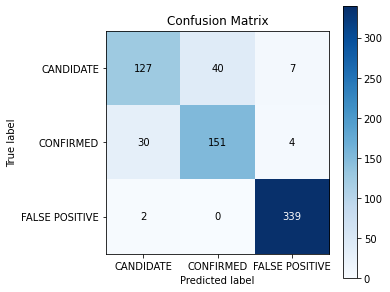

In [21]:
skplt.metrics.plot_confusion_matrix(y_test, grid1_prediction, figsize=(5,5))

## Using SVC 

In [22]:
model2 = SVC()
model2.fit(X_train_scaled, y_train)

SVC()

In [23]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train):.2f}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test):.2f}")

Training Data Score: 0.83
Testing Data Score: 0.83


In [24]:
model2.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Using SVC with Grid search
### Hyperparameter Tuning

In [25]:
# Train the model with GridSearch
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]} 
grid2 = GridSearchCV(SVC(), param_grid=param_grid, refit=True, verbose=1)
grid2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  1.8min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]},
             verbose=1)

In [26]:
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 100, 'gamma': 1}
0.8903188615892443


In [27]:
grid2_prediction = grid2.predict(X_test_scaled)

In [28]:
print(confusion_matrix(y_test, grid2_prediction))
print(classification_report(y_test, grid2_prediction))

[[125  45   4]
 [ 34 146   5]
 [  3   0 338]]
                precision    recall  f1-score   support

     CANDIDATE       0.77      0.72      0.74       174
     CONFIRMED       0.76      0.79      0.78       185
FALSE POSITIVE       0.97      0.99      0.98       341

      accuracy                           0.87       700
     macro avg       0.84      0.83      0.83       700
  weighted avg       0.87      0.87      0.87       700



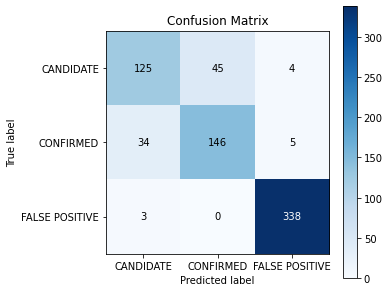

In [29]:
skplt.metrics.plot_confusion_matrix(y_test, grid2_prediction, figsize=(5,5))

# Save the Model

In [30]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'models/model1.h5'
joblib.dump(model1, filename)
filename = 'models/model2.h5'
joblib.dump(model2, filename)

['models/model2.h5']